In [ ]:
import seaborn as sns
import numpy as np

**Caricamento del dataset**

Iniziamo caricando il dataset `tips`.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

: 

**La funzione `relplot()`**

Vediamo adesso quale è l'andamento del rapporto tra conto e mance giorno per giorno. Inoltre, diamo ai diversi simboli delle dimensioni direttamente proporzionali all'entità della mancia.

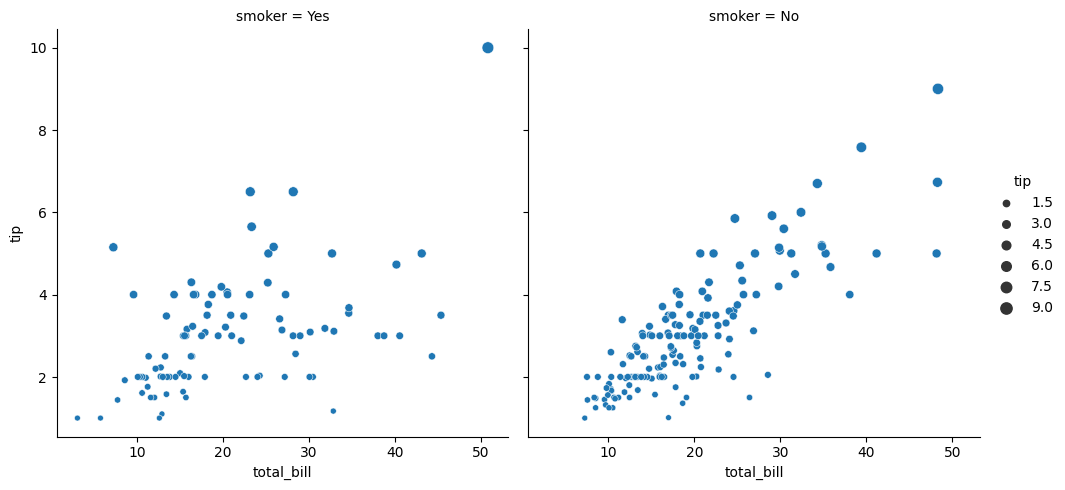

In [6]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='smoker',
    size='tip')

La funzione [`replot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) ci offre un esempio di *scatter plot*, ovvero una particolare tipologia di grafico che viene spesso utilizzato per visualizzare come si "diffondono" dei dati su due o tre dimensioni.

Proviamo adesso a vedere come variano le mance in funzione del conto a seconda del fatto che i clienti siano uomini o donne:

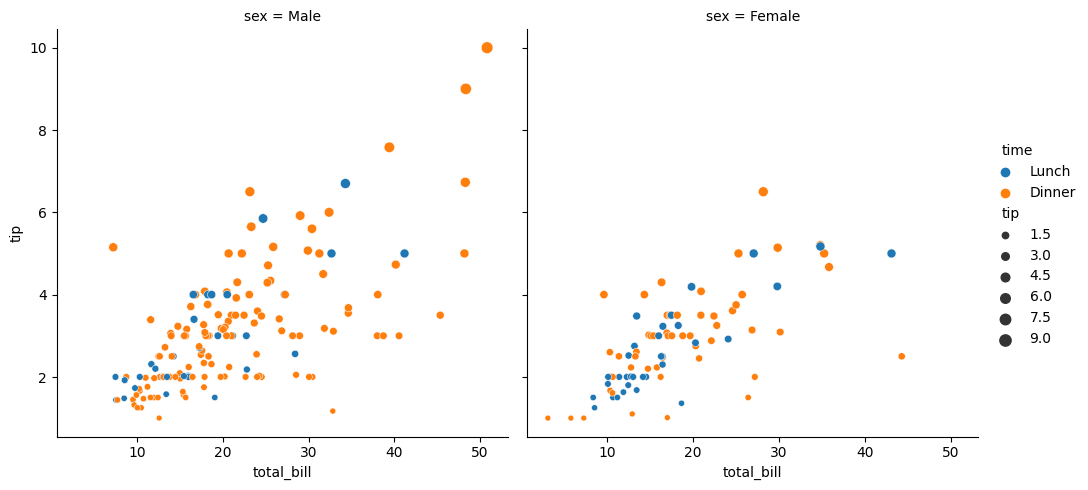

In [8]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex',
    size='tip',
    hue='time')

Nel grafico precedente abbiamo assegnato anche il parametro `hue`, che assegna una tinta differente a seconda del valore associato alla categoria indicata dal parametro (in questo caso, il giorno della settimana).

**La funzione `lmplot()`**

Una variante della funzione `relplot()` è la [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html), la cui sintassi e parametrizzazione è praticamente equivalente, ma che permette di integrare anche le approssimazioni ai minimi quadrati dei dati visualizzati. Ad esempio:

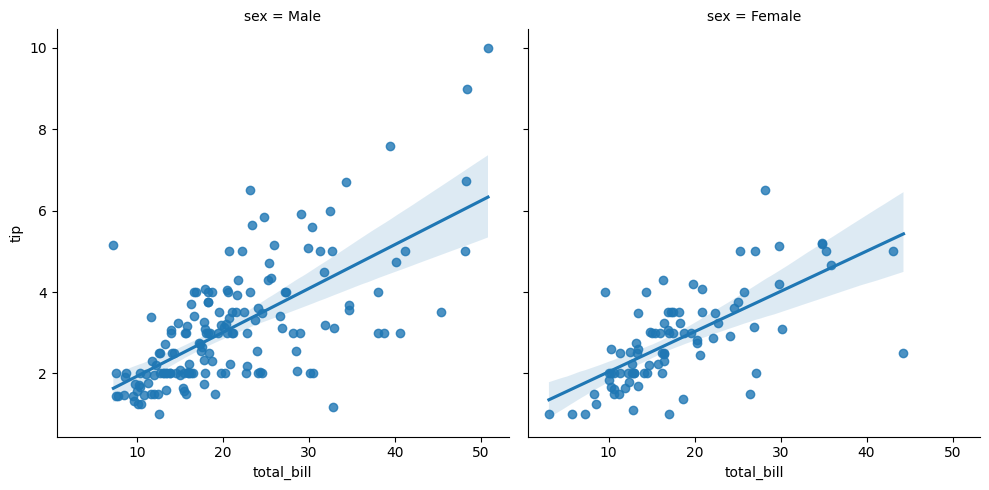

In [10]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex')

Se proviamo ad impostare il parametro `hue` otterremo risultati più "granulari".

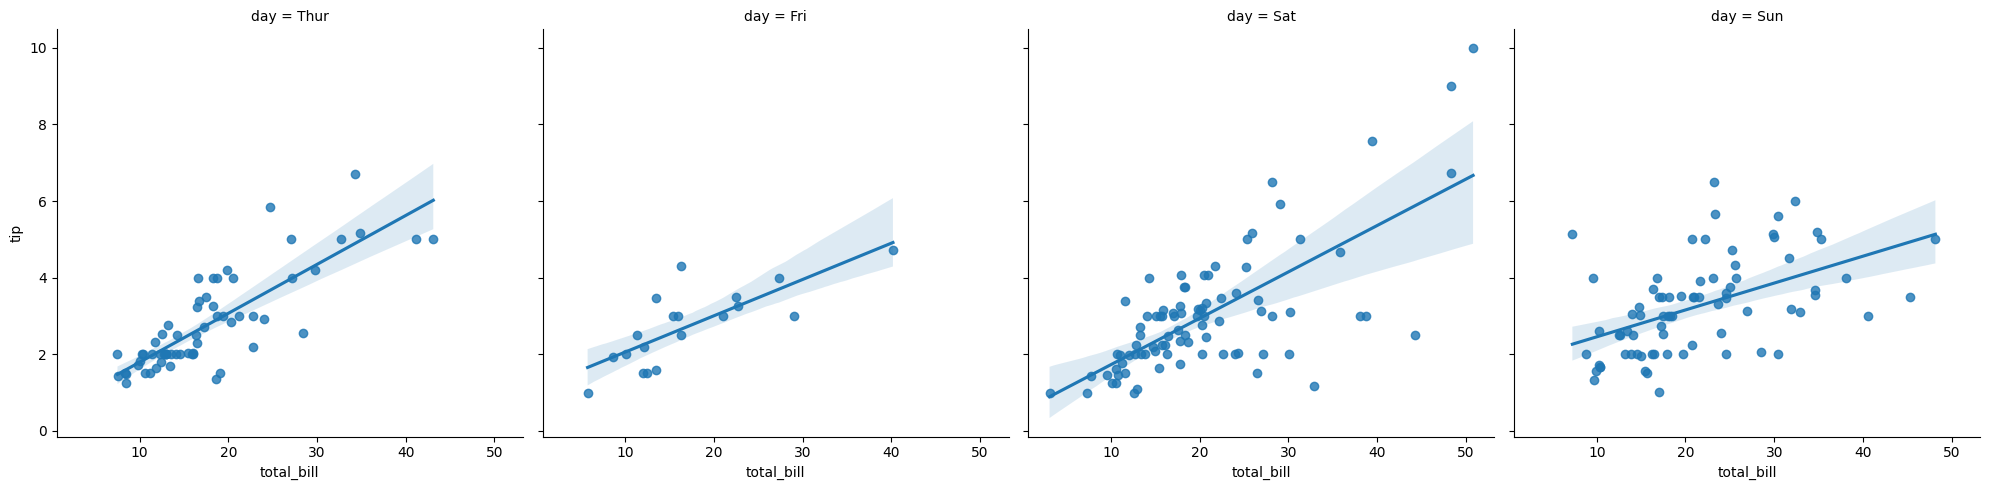

In [ ]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='day')

Dal grafico precedente possiamo quindi scoprire come il ristorante non sia aperto il sabato e la domenica a pranzo, oltre che il giovedì a cena.

La `lmplot()` non supporta esclusivamente regressioni di tipo lineare. Ad esempio, potremmo specificare il parametro `order`, che fa in modo che i punti siano approssimati mediante un polinomio di ordine pari al valore indicato.

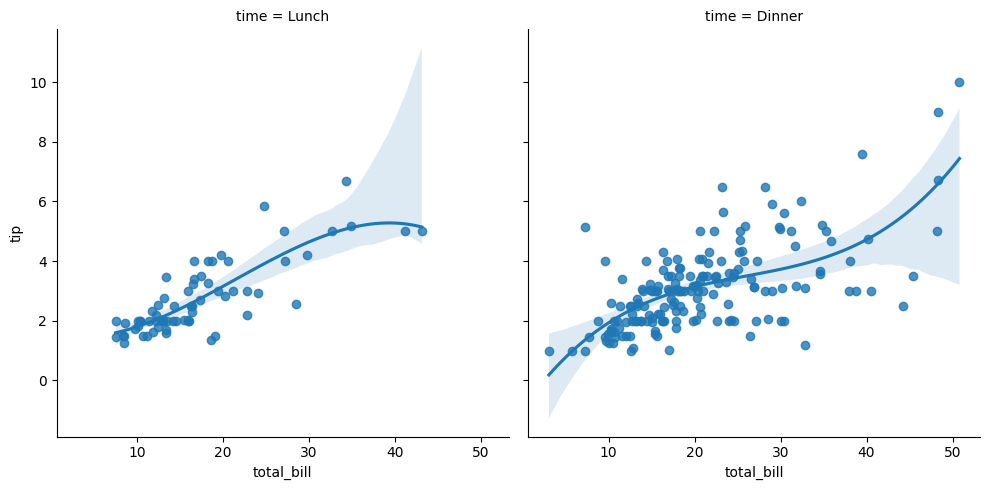

In [13]:
import matplotlib.pyplot as plt
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    order=3)
plt.savefig('immagine.png')

Ancora, potremmo usare una regressione non parametrica mediante il parametro `lowess`, che in pratica calcola un modello lineare "a tratti", pesato sulla base dei valori assunti in determinati intervalli dall'insieme dei punti.

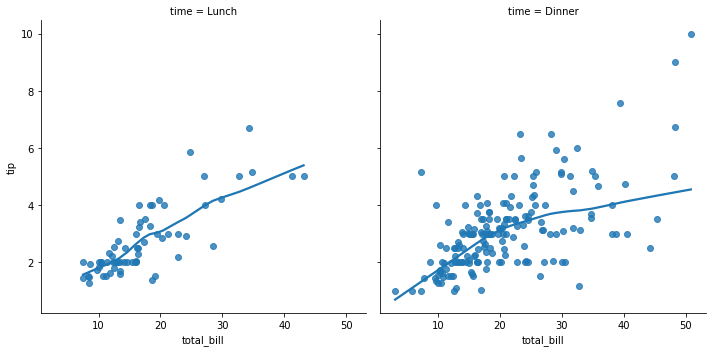

In [8]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    lowess=True)

Esistono poi anche altre possibilità, come quelle di usare una regressione di tipo logistico o robusto. Per un completo excursus, si rimanda alla reference.

Un'altra possibilità è quella di visualizzare la distribuzione dei dati mediante la funzione [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), sfruttando magari delle approssimazioni mediante tecniche come la [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

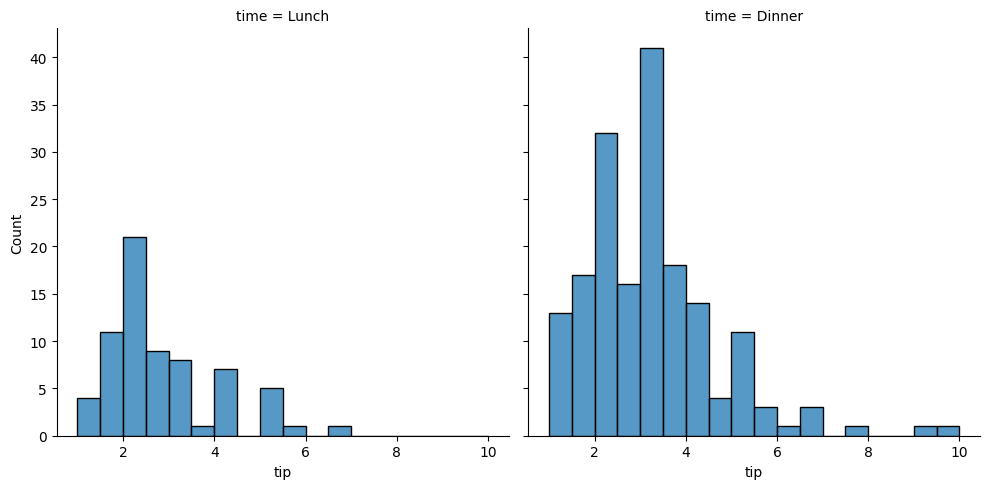

In [18]:
sns.displot(
    data=tips,
    x='tip',
    col='time',
    kde=False)

Dal grafico precedente scopriamo che è decisamente più conveniente fare il cameriere di sera, in quanto le mance sono più elevate.

In ultimo, mostriamo la funzione [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html), che produce grafici specificamente pensati per visualizzare come si distribuiscono i dati a seconda delle diverse categorie presenti.

c:\Users\acard\.virtualenvs\python-calcolo-numerico-5v4ihblp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


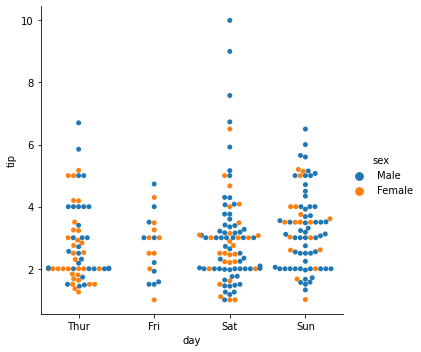

In [10]:
sns.catplot(
    data=tips,
    kind='swarm',
    x='day',
    y='tip',
    hue='sex')

Nel grafico precedente possiamo vedere come si "distribuiscono" le mance date da uomini e donne durante le diverse giornate di apertura. Nella figura successiva possiamo vedere lo stesso grafico con una differente tipologia di visualizzazione, chiamata *violin plot*, e determinata modificando il parametro `kind`:

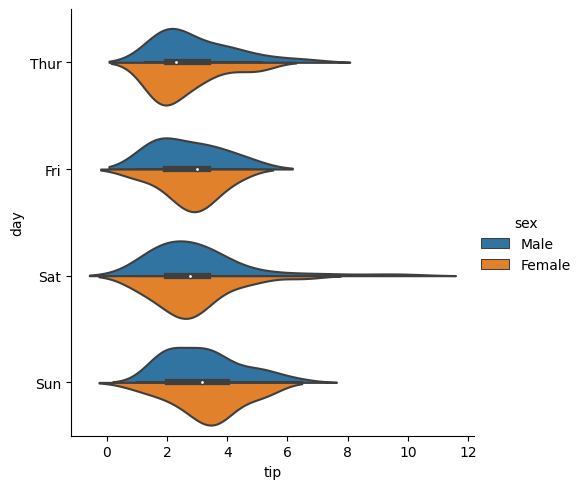

In [23]:
sns.catplot(
    data=tips,
    kind='violin',
    x='tip',
    y='day',
    hue='sex',
    split=True)

In ultimo proviamo a visualizzare la heatmap definita a partire da un array NumPy:

<AxesSubplot:>

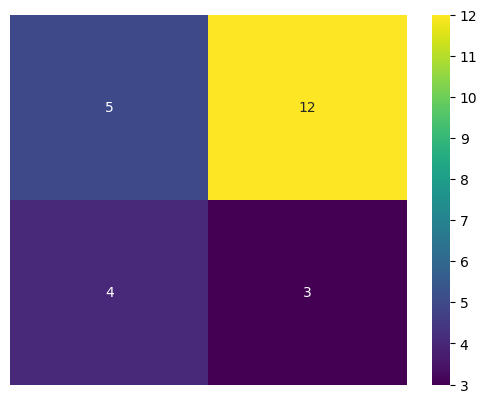

In [24]:
ar = np.array([[5, 12], [4, 3]])
sns.heatmap(ar, cmap='viridis', annot=True, xticklabels=False, yticklabels=False)

<AxesSubplot:>

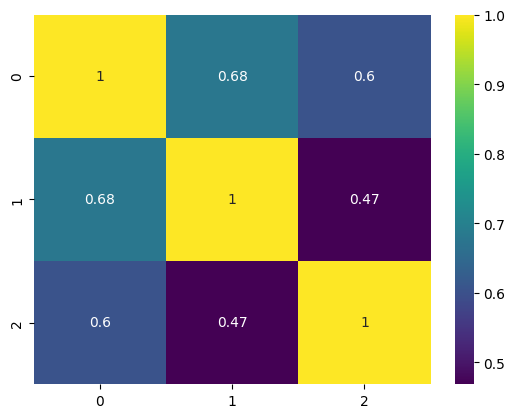

In [31]:
corr = tips.corr(method='spearman').values
sns.heatmap(corr, cmap='viridis', annot=True)

In [29]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Visualizzare la distribuzione dell'età dei diversi passeggeri del Titanic in base al loro genere.

Visualizzare inoltre il rapporto tra età e numero di fratelli/sorelle/coniugi in base al genere del passeggero.

In [33]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


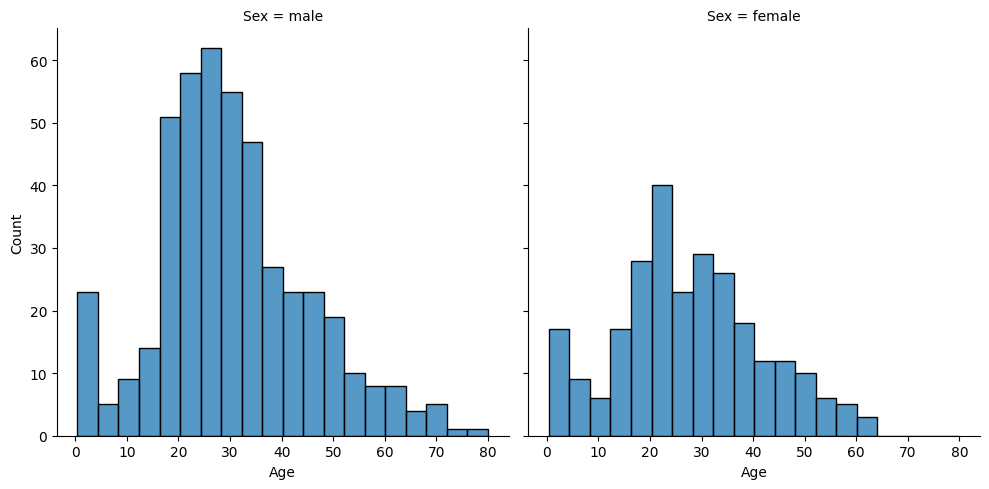

In [37]:
sns.displot(df, x='Age', col='Sex')

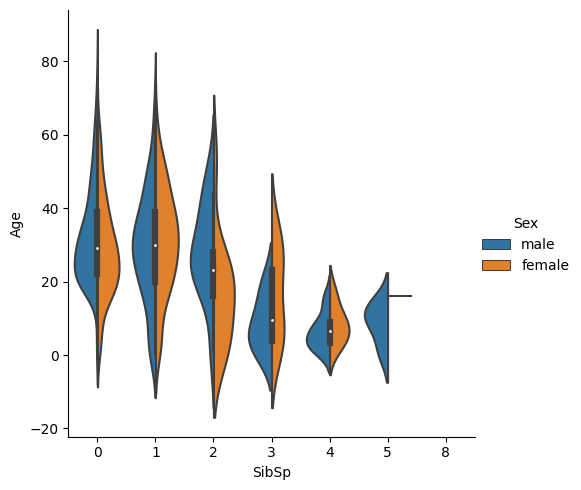

In [39]:
sns.catplot(data=df, kind='violin', x='SibSp', y='Age', hue='Sex', split=True)